Run the cell with code below, by clicking on it and then clicking the "play" trinagle at the top of the screen or hitting `Shift + Enter`. Then scroll down to the graphic that gets produced and adjust the sliders to change their values.

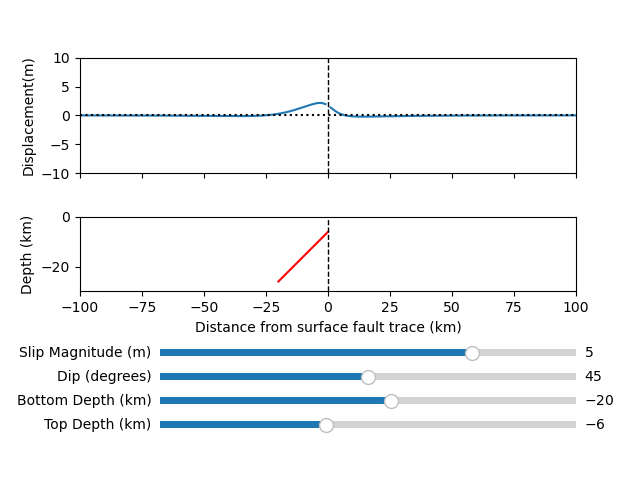

In [1]:
%matplotlib ipympl
from matplotlib.widgets import Slider
from matplotlib import pyplot as plt
import numpy as np
import pickle
# Load the dictionary from the pickle file
with open("simulation_dict.pickle", "rb") as f:
    loaded_simulation_dict = pickle.load(f)

# X and Y axis limits for graph
min_x = -100. # in km
max_x = 100. # in km
min_y_disp = -10. # in m
max_y_disp = 10. # in m
max_y_fault = 0.
min_y_fault = -30.

def fault_end_points(dip, top, bottom):
    """
    Function to calculate the end points of the profile
    """
    tan_dip = np.tan(np.radians(dip))
    top_x = 0.
    top_y = top
    bot_x = bottom / tan_dip
    bot_y = top + bottom * tan_dip
    return bot_x, bot_y, top_x, top_y

# Set up plotting parameters for figure
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].set_xlim(min_x, max_x)
ax[0].set_ylim(min_y_disp, max_y_disp)
ax[1].set_ylim(min_y_fault, max_y_fault)
ax[1].set_aspect("equal")
ax[1].set_xlabel("Distance from surface fault trace (km)")
ax[1].set_ylabel("Depth (km)")
ax[0].set_ylabel("Displacement(m)")

# Plot the lines that the interactive bit will later change
first_profile_x = np.arange(min_x, max_x + 1., 1.)
first_profile_y = loaded_simulation_dict.get((-6., -20., 45., 5.))
line1, = ax[0].plot(first_profile_x, first_profile_y)
bx, by, tx, ty = fault_end_points(45., -6., -20.)
line2, = ax[1].plot((bx, tx), (by, ty), color="r")

# Plot the x and y axes for reference
ax[0].hlines(0, min_x, max_x, color="k", ls=":")
ax[0].vlines(0, min_y_disp, max_y_disp, color="k", ls="--", lw=1)
ax[1].vlines(0, min_y_fault, max_y_fault, color="k", ls="--", lw=1)

fig.subplots_adjust(bottom=0.35)
# Create sliders for top depth, bottom depth, dip, and slip magnitude
top_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03])
bottom_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03])
bottom_depth_slider = Slider(bottom_ax, 'Bottom Depth (km)', -30, -12, valinit=-20, valstep=2)
top_depth_slider = Slider(top_ax, 'Top Depth (km)', -10, 0, valinit=-5, valstep=2)
dip_ax = fig.add_axes([0.25, 0.2, 0.65, 0.03])
dip_slider = Slider(dip_ax, 'Dip (degrees)', 5, 85, valinit=45, valstep=5)
slip_ax = fig.add_axes([0.25, 0.25, 0.65, 0.03])
slip_slider = Slider(slip_ax, 'Slip Magnitude (m)', -10, 10, valinit=5, valstep=1)




# Function to update the plot based on slider values
def update(val):
    top_depth = top_depth_slider.val
    bottom_depth = bottom_depth_slider.val
    dip = dip_slider.val
    slip_magnitude = slip_slider.val
    
    # Get the displacement profile for the current parameters
    disp = loaded_simulation_dict.get((top_depth, bottom_depth, dip, slip_magnitude))
    print(disp)
    
    if disp is not None:
        line1.set_ydata(disp)
        bx, by, tx, ty = fault_end_points(dip, top_depth, bottom_depth)
        line2.set_xdata((bx, tx))
        line2.set_ydata((by, ty))
        fig.canvas.draw_idle()

# Connect the sliders to the update function
top_depth_slider.on_changed(update)
bottom_depth_slider.on_changed(update)
dip_slider.on_changed(update)
slip_slider.on_changed(update)
# Show the plot
plt.show()